# Joshua Milliken

## Best Inequality Statistic for Corruption Perception Predictions

Looking at many inequality indicators and finding which has the highest correlation with the Corruption Perception Index (CPI) in the top 24 most developed countries is Africa.

In [5]:
import pandas as pd
import datapackage
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from project_functions1 import load_and_process, scatter_plot1, sp50, cpi_timeseries, cpi_year, NatIncome, Pop, AllNatIncome

## Exploritory Analysis

In [6]:
CID = load_and_process()

In [8]:
print("Number of rows and columns:", CID.shape)
print(f"Number of Countries: {CID['country'].nunique()}")

Number of rows and columns: (7344, 7)
Number of Countries: 24


In [9]:
CID.head()

,country,variable,percentile,year,value,age,pop
0,SC,sptinc992j,p90p100,1998,0.5271,992,j
1,MU,sptinc992j,p90p100,1998,0.4578,992,j
2,DZ,sptinc992j,p90p100,1998,0.4193,992,j
3,TN,sptinc992j,p90p100,1998,0.4888,992,j
4,BW,sptinc992j,p90p100,1998,0.6949,992,j


In [10]:
CID.describe()

,country,variable,percentile,year,value,age,pop
count,7344,7344,7344,7344,7344,7344,7344
unique,24,5,6,18,2694,3,3
top,SC,sptinc992j,p0p100,1998,-,992,i
freq,306,1728,5184,408,69,5184,5184


#### From this we can see that there are 69 missing values denoted by '-'
#### sptinc992j being the most common variable because it denotes all the percentages
#### age and population are mostly irrelavent and are usefull mostly for standardizing concatinations

## Correlation between Share of national income and perceptions of inequality
### Top 1%

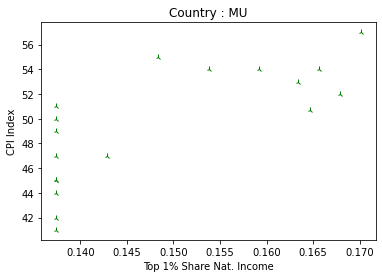

In [11]:
scatter_plot1()

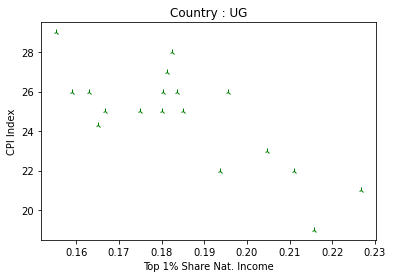

In [12]:
scatter_plot1('UG')

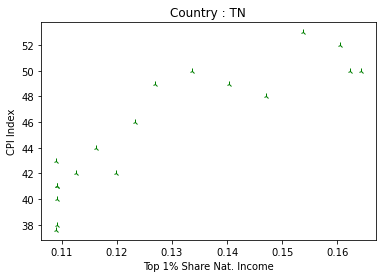

In [13]:
scatter_plot1('TN')

### From the selected countries, there is no clear correlation between CPI and percentage of national income that the top 1% have

### Bottom 50 %

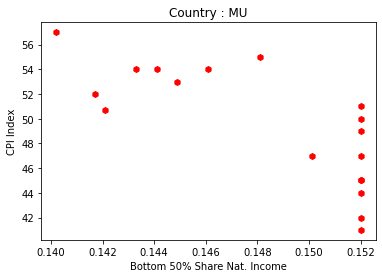

In [14]:
sp50()

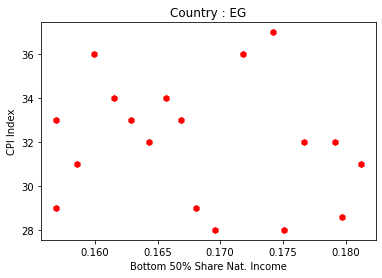

In [15]:
sp50('EG')

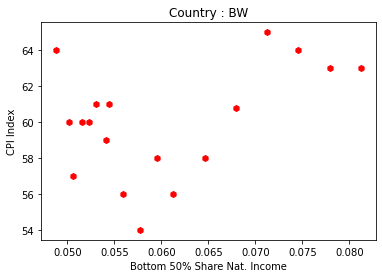

In [16]:
sp50('BW')

### From the selected countries, there is no clear correlation between CPI and percentage of national income that the bottom 50% have

## Changes in Corruption Pereception Index over time

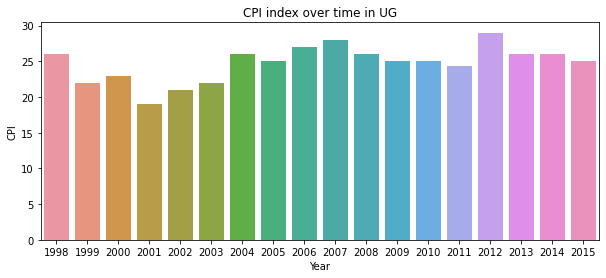

In [17]:
cpi_timeseries()

### The country SC-Seychelles is showing a move towards higher perceptions of inequality

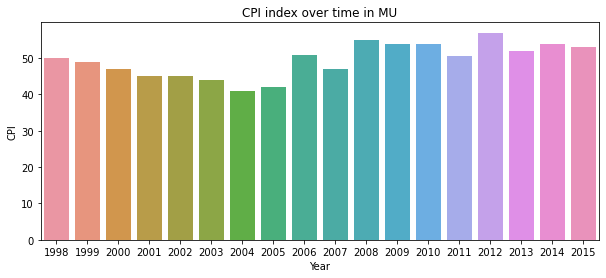

In [18]:
cpi_timeseries('MU')

### The country MU-Mauritius does not have any clear trend in changes to CPI

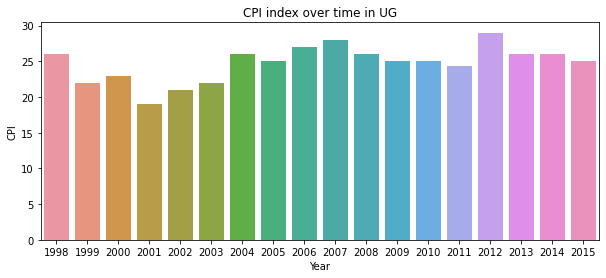

In [19]:
cpi_timeseries('UG')

### The country of UG-Uganda does not clearly have a trend in chnages in CPI

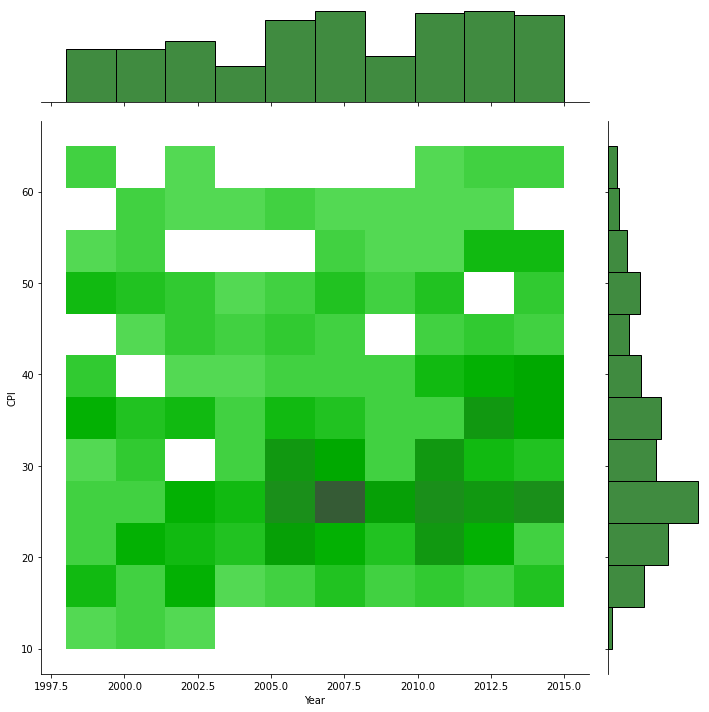

In [20]:
CPI = CID.loc[CID['variable'] == 'CPI'].reset_index(drop=True).drop_duplicates()
CPI = CPI[CPI.value != '-']
cpiy = sns.jointplot(x = CPI['year'], y = CPI['value'], kind = 'hist', color = 'darkgreen', ratio = 5, height = 10)
cpiy.set_axis_labels('Year', 'CPI')


### This is essentially and aggrigation of the barplots above and below. The data suggests that CPI is mostly around 20-45. The top bar simply shows which years there is a lot of data. Since there was a lot of missing values, the amount of data points per year changes significanlty.

## Corruption Perception Index in every country in select year

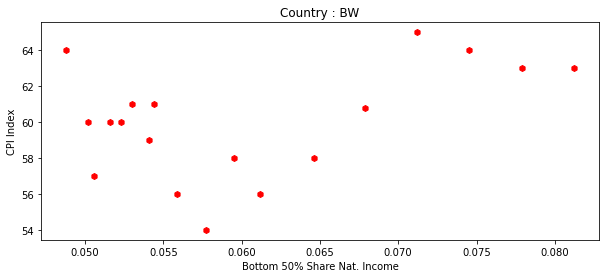

In [21]:
sp50('BW')

### From the selected countries, there is no clear correlation between CPI and percentage of national income that the bottom 50% have

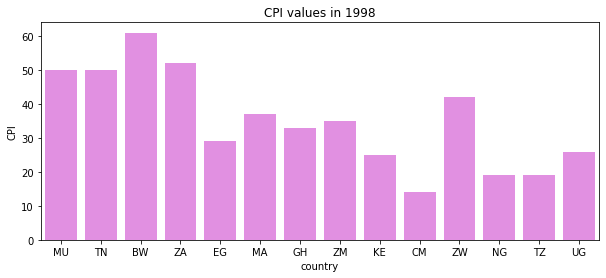

In [22]:
cpi_year(1998)

### In 1998, it appears that CM-Cameroon has the lowest CPI, BW-Botswana has the highest, and average CPI is about 30
### There are a lot of missing countries indicating there were missing values for this year

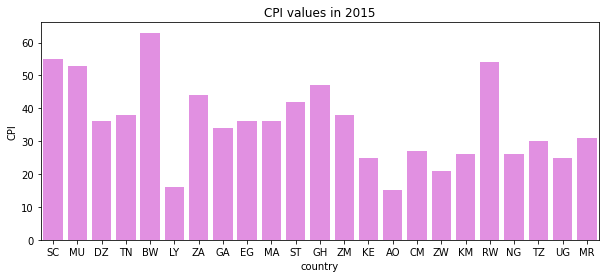

In [23]:
cpi_year()

### In 2015, the trends layed out in 1998 remain the same, however AO-Angola or LY-Lybia is the lowest as thye is not missing
### This is a more complete dataset

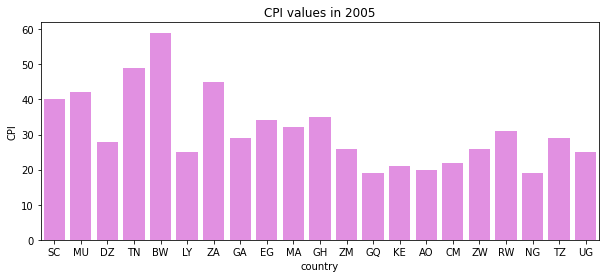

In [24]:
cpi_year(2005)

### There are still some missing countries in 2005
### Overall trennds remain the same if not converge to the averga around 25-30 for CPI

## National Income as an Indicator of Corruption Perceptions

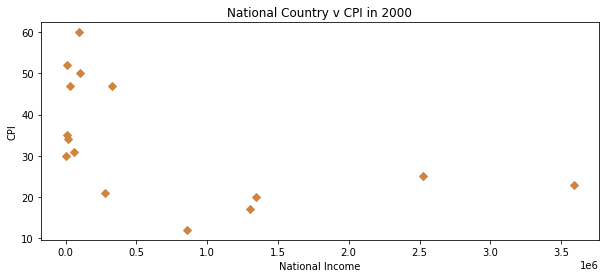

In [25]:
NatIncome(2000)

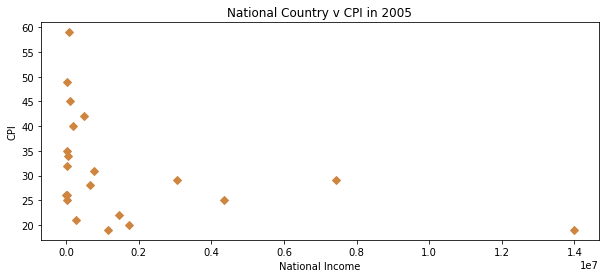

In [26]:
NatIncome(2005)

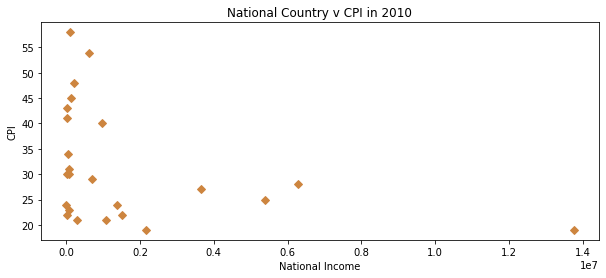

In [27]:
NatIncome(2010)

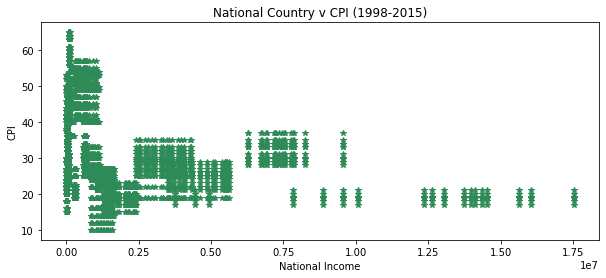

In [28]:


AllNatIncome()

##### As can be seen by the individual years and the aggrigated plot, there is a stronger correlation betwee Increased National Income and Decreased CPI

# Population

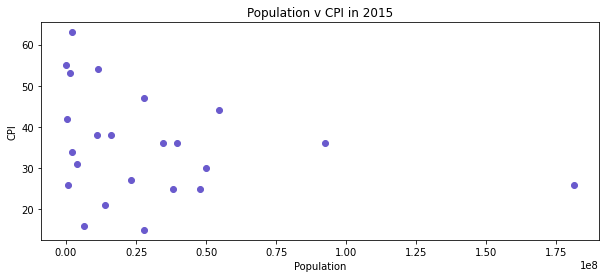

In [29]:
Pop()

##### There is obviosly no correlation between the population of a country and the CPI

# Conclusion
#### While inequality is a decent indicator of Corruption Perceptions, other factors such as National income were better predictors. This was also a limited case with only countries in Africa. It would be supposed that with more countries that are more diverse then just on one contenent, there would be a higher correlation between inequality and CPI.